# 1. Data Understanding

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Membaca data
superstore_df = pd.read_excel('/content/drive/MyDrive/DATA SET/superstore_dataset1.xlsx')


In [ ]:
superstore_df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9994 non-null   int64         
 1   order_id       9994 non-null   object        
 2   order_date     9994 non-null   datetime64[ns]
 3   ship_date      9994 non-null   datetime64[ns]
 4   ship_mode      9994 non-null   object        
 5   customer_id    9994 non-null   object        
 6   customer_name  9994 non-null   object        
 7   segment        9994 non-null   object        
 8   country        9994 non-null   object        
 9   city           9994 non-null   object        
 10  state          9994 non-null   object        
 11  postal_code    9994 non-null   int64         
 12  region         9994 non-null   object        
 13  product_id     9994 non-null   object        
 14  category       9994 non-null   object        
 15  subcategory    9994 n

## mengelompkan data by Customer

In [ ]:
df_customers = (
    superstore_df
    .groupby("customer_id", as_index=False)
    .agg(
        purchase_frequency = ("order_id", lambda s: s.nunique()),   # number of unique orders
        total_spent        = ("sales", "sum"),                      # total spending
        total_profit       = ("profit", "sum"),                     # total profit
        city               = ("city", "first"),                     # lokasi
        state              = ("state", "first"),
        region             = ("region", "first")
    )
)

# Tambahan insight: rata-rata belanja per order (hindari pembagian 0)
df_customers["avg_spent_per_order"] = df_customers.apply(
    lambda r: r["total_spent"] / r["purchase_frequency"] if r["purchase_frequency"] > 0 else 0,
    axis=1
)

# Urutkan kolom supaya output rapi (opsional)
cols = ["customer_id", "purchase_frequency", "total_spent", "avg_spent_per_order", "total_profit", "city", "state", "region"]
df_customers = df_customers[cols]

In [ ]:
df_customers.head()

,customer_id,purchase_frequency,total_spent,avg_spent_per_order,total_profit,city,state,region
0,AA-10315,5,5563.560,1112.712000,-362.8825,Minneapolis,Minnesota,Central
1,AA-10375,9,1056.390,117.376667,277.3824,Mesa,Arizona,West
2,AA-10480,4,1790.512,447.628000,435.8274,Concord,North Carolina,South
3,AA-10645,6,5086.935,847.822500,857.8033,Chester,Pennsylvania,East
4,AB-10015,3,886.156,295.385333,129.3465,Seattle,Washington,West


In [ ]:
df_customers.describe()

,purchase_frequency,total_spent,avg_spent_per_order,total_profit
count,793.000000,793.000000,793.000000,793.000000
mean,6.316520,2896.848500,460.147734,361.156396
std,2.550885,2628.670117,433.400951,894.261812
min,1.000000,4.833000,2.416500,-6626.389500
25%,5.000000,1146.050000,213.255333,36.613100
50%,6.000000,2256.394000,362.503250,227.833800
75%,8.000000,3785.276000,550.377000,560.007800
max,17.000000,25043.050000,5008.610000,8981.323900


In [ ]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          793 non-null    object 
 1   purchase_frequency   793 non-null    int64  
 2   total_spent          793 non-null    float64
 3   avg_spent_per_order  793 non-null    float64
 4   total_profit         793 non-null    float64
 5   city                 793 non-null    object 
 6   state                793 non-null    object 
 7   region               793 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 49.7+ KB


In [ ]:
df_customers.isnull().sum()

,0
customer_id,0
purchase_frequency,0
total_spent,0
avg_spent_per_order,0
total_profit,0
city,0
state,0
region,0


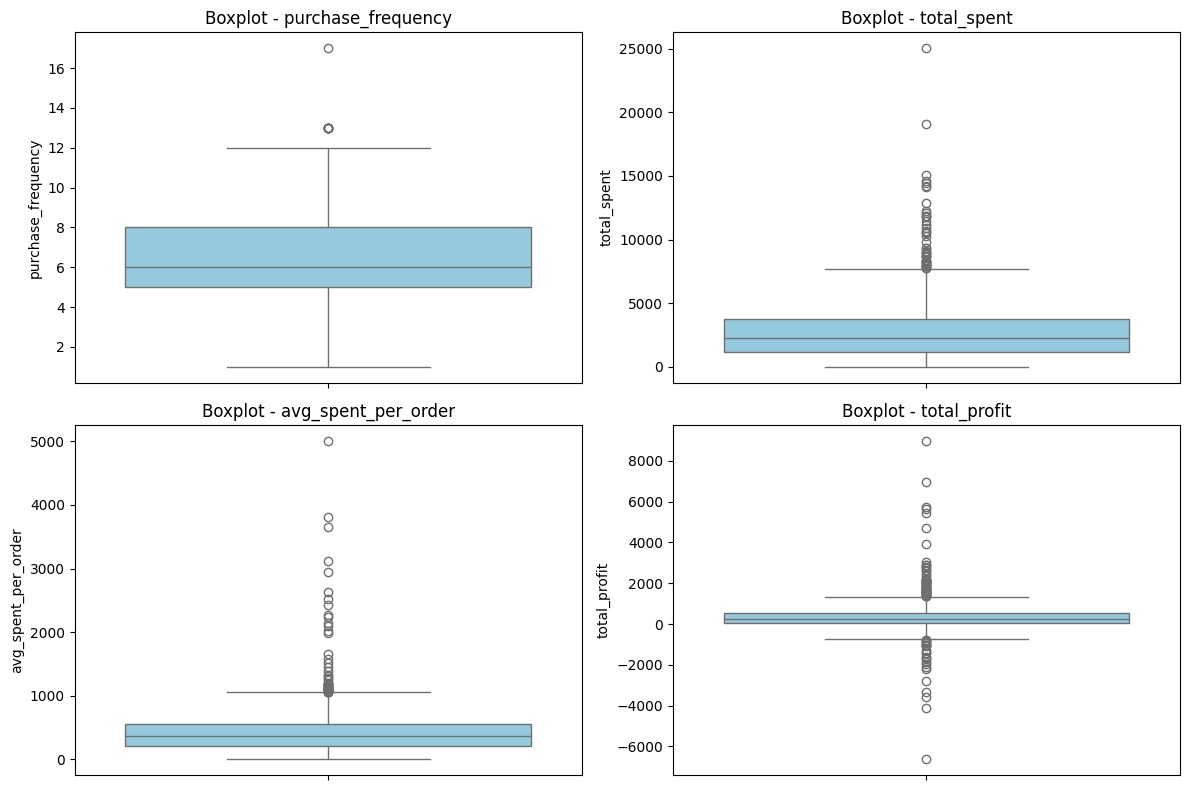

In [ ]:
# cek outlier
numerical_columns = df_customers.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns)+1)//2, 2, i)  # bikin grid 2 kolom
    sns.boxplot(y=df_customers[col], color='skyblue')
    plt.title(f"Boxplot - {col}")

plt.tight_layout()
plt.show()


In [ ]:
#export this data
df_customers.to_excel("customer_summary.xlsx", index=False)

In [ ]:
from google.colab import files
files.download("customer_summary.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ditemukan beberapa outliers pada variabel numerik.

Namun outliers tersebut dibiarkan apa adanya karena kemungkinan merepresentasikan perilaku asli customer (high-value customers).

# 2. Analisis Profitabilitas dan Jumlah Pelanggan



*   Gunakan dataset Superstore untuk menghitung profit tertinggi berdasarkan negara.
*   Hitung jumlah pelanggan yang berasal dari negara tersebut.
*   Visualisasikan data dengan tabel atau grafik.

/tmp/ipython-input-598379067.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_by_country.index, y=profit_by_country.values, palette='viridis')


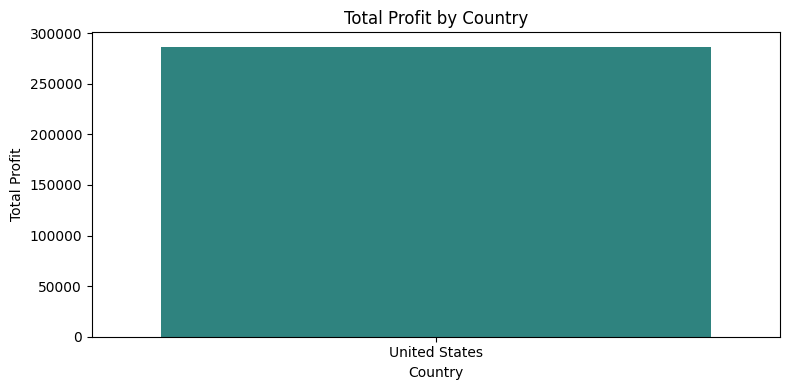

In [ ]:
profit_by_country = superstore_df.groupby('country')['profit'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=profit_by_country.index, y=profit_by_country.values, palette='viridis')
plt.title('Total Profit by Country')
plt.ylabel('Total Profit')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

**Total profit** yang dihasilkan di seluruh transaksi Superstore di AS adalah **sekitar 290 ribu.**

# 3. Analisis Perilaku Pembelian Pelanggan

* Lakukan eksplorasi data terkait **kota dengan jumlah transaksi terbanyak.**
* Identifikasi **kategori produk paling laris.**
* Temukan **jenis pengiriman yang paling sering digunakan** oleh pelanggan.
* Gunakan visualisasi yang sesuai untuk memperjelas hasil analisis.


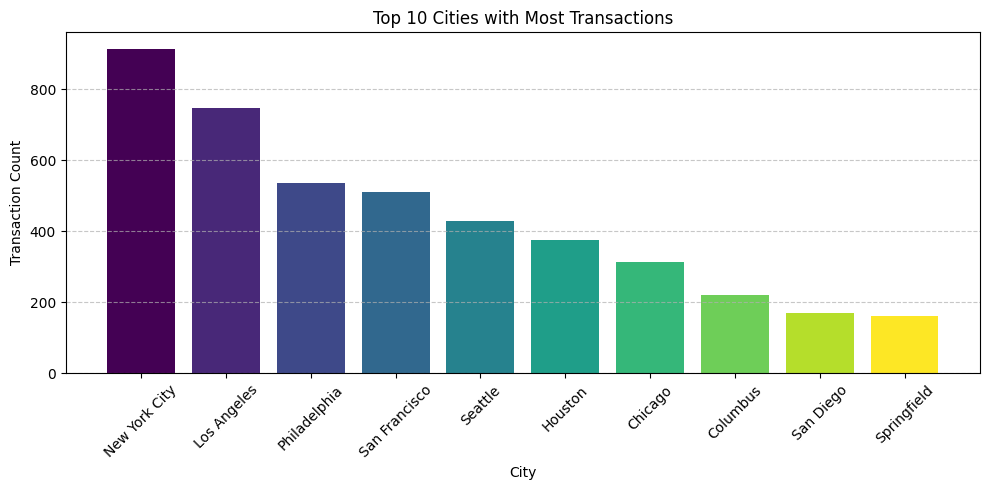

In [ ]:
# top 10 city
top_city = superstore_df['city'].value_counts().head(10)

plt.figure(figsize=(10, 5))

# warna gradasi dengan colormap
colors = cm.viridis(np.linspace(0, 1, len(top_city)))

# Plot bar dengan gradient warna
plt.bar(top_city.index, top_city.values, color=colors)

# detail chart
plt.title('Top 10 Cities with Most Transactions')
plt.xlabel('City')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


* **New York City** mendominasi transaksi secara signifikan dengan jumlah lebih dari 900 transaksi. Ini menunjukkan bahwa NYC merupakan pasar utama yang paling potensial.

* **Los Angeles** berada di posisi kedua dengan selisih cukup besar dibandingkan NYC, tetapi tetap jauh lebih tinggi dibanding kota-kota lain.

* Setelah dua kota besar tadi, ada penurunan tajam di **Philadelphia, San Francisco, dan Seattle**. Artinya kontribusi transaksi mulai lebih menyebar, tapi skalanya tidak sebesar NYC dan LA.

* **Houston, Chicago, Columbus, San Diego, dan Springfield** menutup daftar 10 besar dengan volume transaksi yang relatif lebih rendah. Ini bisa jadi menunjukkan potensi pasar yang masih berkembang atau keterbatasan penetrasi produk di wilayah tersebut.

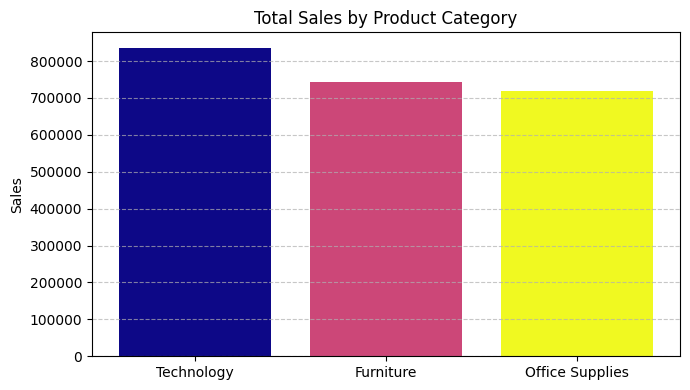

In [ ]:
# total sales per kategori
top_category = superstore_df.groupby('category')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(7, 4))

# Buat warna gradasi dari colormap
colors = cm.plasma(np.linspace(0, 1, len(top_category)))

# Plot bar chart dengan gradient warna
plt.bar(top_category.index, top_category.values, color=colors)

# detail chart
plt.title('Total Sales by Product Category')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* **Technology** menjadi kategori dengan penjualan tertinggi, lebih dari 830 ribu. Ini menunjukkan bahwa produk teknologi adalah penyumbang revenue terbesar dan bisa dianggap sebagai produk andalan.

* **Furniture** menempati posisi kedua dengan total penjualan sekitar 740 ribu, selisih tidak terlalu jauh dari Technology, sehingga kategori ini juga cukup penting dan punya potensi pasar besar.

* **Office Supplies** berada di posisi ketiga dengan sekitar 720 ribu. Walaupun lebih rendah, penjualannya masih cukup tinggi, menunjukkan permintaan yang stabil.

/tmp/ipython-input-524181996.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


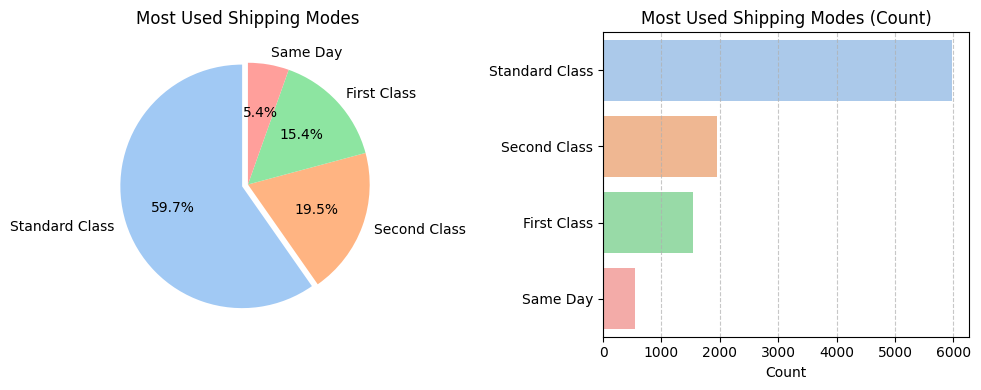

In [ ]:
# Data
top_ship_mode = superstore_df['ship_mode'].value_counts()

plt.figure(figsize=(10, 4))

# --- Pie Chart ---
plt.subplot(1, 2, 1)
explode = [0.05] + [0]*(len(top_ship_mode)-1)  # highlight kategori pertama
top_ship_mode.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel'),
    explode=explode,
    startangle=90
)
plt.title('Most Used Shipping Modes')
plt.ylabel('')

# --- Bar Plot ---
plt.subplot(1, 2, 2)
sns.barplot(
    x=top_ship_mode.values,
    y=top_ship_mode.index,
    palette="pastel"
)
plt.title('Most Used Shipping Modes (Count)')
plt.xlabel('Count')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

* **Standard Class** adalah metode pengiriman paling dominan dengan porsi ~60%. Hal ini menunjukkan bahwa mayoritas pelanggan memilih opsi pengiriman standar, kemungkinan karena biaya lebih murah meskipun waktu lebih lama.

* **Second Class** (19.5%) dan **First Class** (15.4%) masih cukup signifikan, menunjukkan ada kelompok pelanggan yang bersedia membayar lebih untuk kecepatan atau layanan yang lebih baik.

* **Same Day** hanya dipakai sekitar 5.4%, artinya sangat sedikit pelanggan yang membutuhkan pengiriman instan — mungkin karena biayanya lebih mahal atau produknya tidak terlalu mendesak.